In [1]:
import gymnasium as gym
import numpy as np

Initiallizing environment

In [9]:
env = gym.make('FrozenLake-v1', render_mode = "human", is_slippery = False) # desc=["SFFF", "FHFH", "FFFH", "HFFG"]
env.metadata["render_fps"] = 120


Q-Table

In [13]:
n_states = env.observation_space.n # 16
n_actions = env.action_space.n # 4

Q = np.zeros((n_states, n_actions))

learning_rate = 0.9
discount_factor = 0.85
epsilon = 1
epsilon_decay = 0.0001

episodes = 1000

rewards_per_episode = np.zeros(episodes)

for episode in range(episodes):
    state, info = env.reset()
    terminated, truncated = False, False

    while (not truncated and not terminated):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, terminated, truncated, info = env.step(action)

        Q[state,action] = Q[state,action] + learning_rate * (
                        reward + discount_factor * np.max(Q[next_state,:]) - Q[state,action]
        )
        
        state = next_state

    epsilon = max(epsilon - epsilon_decay, 0)

    if(epsilon==0):
        learning_rate_a = 0.0001

    if reward == 1:
        rewards_per_episode[episode] = 1


In [16]:
Q

array([[0.37714952, 0.44370531, 0.44370531, 0.37714952],
       [0.37714952, 0.        , 0.52200625, 0.44370531],
       [0.44370531, 0.614125  , 0.44370531, 0.52200625],
       [0.52200625, 0.        , 0.44370531, 0.44370531],
       [0.44370531, 0.52200625, 0.        , 0.37714952],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.7225    , 0.        , 0.52200625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.52200625, 0.        , 0.614125  , 0.44370531],
       [0.52200625, 0.7225    , 0.7225    , 0.        ],
       [0.614125  , 0.85      , 0.        , 0.614125  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.7225    , 0.85      , 0.614125  ],
       [0.7225    , 0.85      , 1.        , 0.7225    ],
       [0.        , 0.        , 0.        , 0.        ]])

Graph of Rewards over Episodes

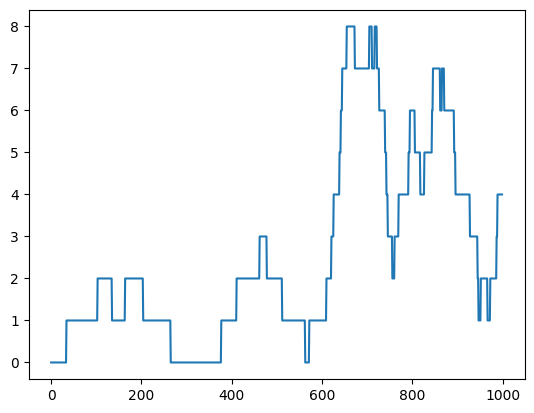

In [17]:
import matplotlib.pyplot as plt 

sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
plt.plot(sum_rewards)

Testing

In [19]:
import time

state, _ = env.reset()
terminated, truncated = False, False

while not terminated and not truncated:
    action = np.argmax(Q[state, :])
    print(state, Q[state, :])
    next_state, _, terminated, truncated, _ = env.step(action)
    print(next_state)
    state = next_state

    env.render()

    time.sleep(1)

0 [0.37714952 0.44370531 0.44370531 0.37714952]
4
4 [0.44370531 0.52200625 0.         0.37714952]
8
8 [0.52200625 0.         0.614125   0.44370531]
9
9 [0.52200625 0.7225     0.7225     0.        ]
13
13 [0.       0.7225   0.85     0.614125]
14
14 [0.7225 0.85   1.     0.7225]
15
